In [4]:
]activate .

Activating environment at `~/hypergraph-clustering/jl/Project.toml`


In [7]:
using Pkg, SimpleHypergraphs, Random, ProgressBars, Plots, ProgressMeter, JLD2, FileIO, PyPlot, ScikitLearn
@sk_import metrics : f1_score
@sk_import metrics : accuracy_score
include("HypergraphClustering.jl")

┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/SimpleHypergraphs/rB8ho.ji for SimpleHypergraphs [aa4a32ff-dd5d-5357-90e3-e7a9512f0501]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/ScikitLearn/tbUuI.ji for ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1240


h2correlation (generic function with 1 method)

In [10]:
include("./CreateHypergraph.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [10 for i in 1:5]

rg1, tr_data1 = create_hypergraph(10, a, b, 0.3, 5)
vi1 = visu(rg1)
# Plots.scatter(vi)

2203-element Array{Tuple{Int64,Int64},1}:
 (1, 40)  
 (1, 62)  
 (1, 11)  
 (1, 9)   
 (1, 25)  
 (1, 60)  
 (1, 75)  
 (1, 65)  
 (1, 22)  
 (1, 44)  
 (1, 24)  
 (1, 73)  
 (1, 37)  
 ⋮        
 (55, 439)
 (55, 5)  
 (55, 23) 
 (55, 498)
 (55, 349)
 (55, 496)
 (55, 480)
 (55, 331)
 (55, 276)
 (55, 301)
 (55, 108)
 (55, 15) 

In [11]:
include("./CreateHypergraph.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [30 for i in 1:5]

rg2, tr_data2 = create_hypergraph(10, a, b, 0.3, 15)
vi2 = visu(rg2)
# Plots.scatter(vi)

6649-element Array{Tuple{Int64,Int64},1}:
 (1, 54)   
 (1, 50)   
 (1, 69)   
 (1, 40)   
 (1, 98)   
 (1, 16)   
 (1, 21)   
 (1, 39)   
 (1, 46)   
 (1, 7)    
 (1, 26)   
 (1, 60)   
 (1, 19)   
 ⋮         
 (165, 358)
 (165, 163)
 (165, 472)
 (165, 315)
 (165, 322)
 (165, 349)
 (165, 438)
 (165, 449)
 (165, 218)
 (165, 480)
 (165, 496)
 (165, 15) 

In [12]:
include("./CreateHypergraph.jl")
# 1clusterのnode number
a = [100 for i in 1:20]
# 1clusterのhe number
b = [30 for i in 1:20]

rg3, tr_data3 = create_hypergraph(10, a, b, 0.3, 10)
vi3 = visu(rg3)
# Plots.scatter(vi)

24224-element Array{Tuple{Int64,Int64},1}:
 (1, 68)    
 (1, 32)    
 (1, 50)    
 (1, 81)    
 (1, 40)    
 (1, 16)    
 (1, 11)    
 (1, 85)    
 (1, 7)     
 (1, 26)    
 (1, 35)    
 (1, 34)    
 (1, 66)    
 ⋮          
 (610, 928) 
 (610, 1025)
 (610, 1296)
 (610, 618) 
 (610, 1390)
 (610, 1916)
 (610, 321) 
 (610, 420) 
 (610, 1035)
 (610, 1038)
 (610, 218) 
 (610, 1473)

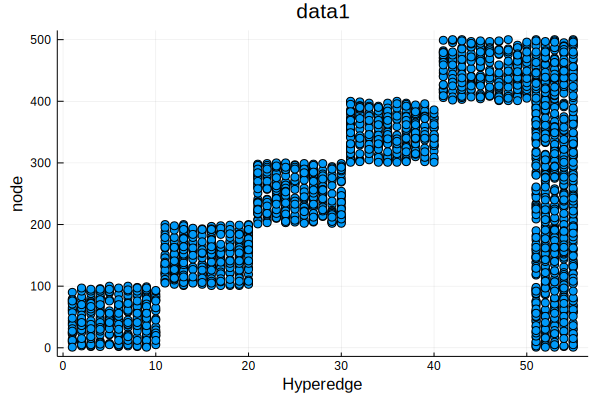

In [25]:
Plots.scatter(vi1, xlabel="Hyperedge", ylabel="node", label="", title="data1")
# Plots.scatter(vi2, xlabel="Hyperedge", ylabel="modularity", label="", title="data1")
# Plots.scatter(vi3, xlabel="Hyperedge", ylabel="modularity", label="", title="data1")

In [14]:
function build_youtube(fname)
    io = open(fname, "r")
    lnum = 0
    recipe = []
    h = Hypergraph{Int}(45352, 13251)
    recipe_dict = Dict{Int,Int}()
    for line in tqdm(eachline(io)) #for each he
        lnum += 1
        if(lnum == 1) 
            continue
        end

        line = split(line, " ")
        
        ingredient_list = split.(line[2:end-2], ":")

        for i in ingredient_list
            ingredient = parse(Int, String(i[1]))
            h[ingredient, lnum-1] = 1
        end
    end
    close(io)

    return h
    
end

@time const youtube = build_youtube("../youtube_giant.blbl")


┣╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱  ┫ -1it 00:01 [-3.8 it/s]
  0.930639 seconds (3.37 M allocations: 171.974 MiB, 12.24% gc time)


45352×13251 Hypergraph{Int64,Nothing,Nothing}:
 nothing  1         nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     

In [742]:
Plots.scatter(vi)

In [183]:
include("./HypergraphClustering.jl")
@time dendorogram,uf,ms1,gs, ks,nvh, hevh, part = clustering3(rg1)
@time dendorogram,uf,ms2,gs, ks,nvh, hevh, part = clustering3(rg2)
@time dendorogram,uf,ms3,gs, ks,nvh, hevh, part = clustering3(rg3)

2185


computing...100%|███████████████████████████████████████| Time: 0:00:01


  2.523367 seconds (9.61 M allocations: 411.650 MiB, 4.05% gc time)
6816


computing...100%|███████████████████████████████████████| Time: 0:00:02


1
  2.487693 seconds (27.57 M allocations: 688.491 MiB, 5.03% gc time)
23969


computing...100%|███████████████████████████████████████| Time: 0:02:26


1
146.400469 seconds (1.49 G allocations: 44.752 GiB, 5.47% gc time)


(Tuple{Int64,Int64,Int64}[(2173, 1, 98), (531, 2, 98), (2591, 3, 98), (1459, 4, 98), (1458, 5, 98), (1879, 6, 98), (246, 7, 98), (3070, 8, 98), (318, 9, 63), (1782, 10, 98)  …  (18063, 2601, 1391), (18008, 2602, 296), (18006, 2603, 1391), (18030, 2604, 1391), (18024, 2605, 1294), (18026, 2606, 1391), (18010, 2607, 1727), (18025, 2608, 1391), (18013, 2609, 1565), (18029, 2610, 1391)], UnionFind{Int64}([98, 98, 98, 98, 98, 1391, 98, 98, 1391, 98  …  1391, 296, 1391, 1391, 1391, 1391, 1391, 1391, 1391, 1391]), Any[-3.965064756440331e-51, -3.965064756440331e-51, -3.967612634084267e-51, -7.181042474431015e-51, -4.4445583803915354e-49, -4.4445583803915354e-49, -4.4445583803915354e-49, -2.72635187409183e-47, -7.220723055581926e-46, -1.0943609137709725e-44  …  0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.7904412068575087, 0.0], Any[0.0, 0.0, 0.0004999999999999999, 0.000999999999

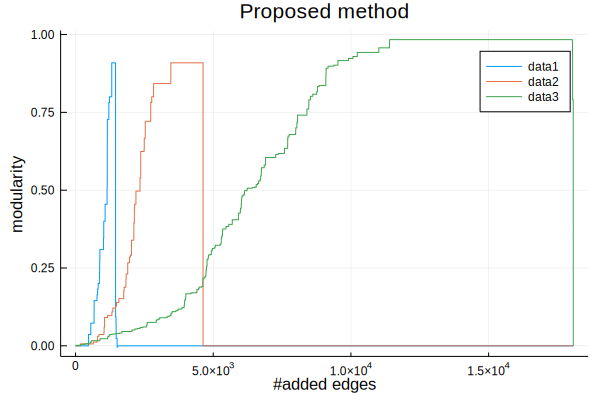

In [262]:
Plots.plot(hcat(ms1, ms2,ms3), label=["data1" "data2" "data3"], title="Proposed method", xlabel="#added edges", ylabel="modularity")
# p2 = Plots.plot(ms2)
# Plots.plot!(p1, ms3)
# Plots.plot((p1, p2))
# p = Plots.plot(p, ms3)

# ms2 = vcat(ms2, [0 for i in 1:length(ms3)-length(ms2)])

In [254]:
cfm = CFModularityCNMLike(5000)
bm, bp, hist3 = findcommunities(rg3, cfm)
# Plots.plot(hist)

(bm = 0.6709640930465283, bp = Set{Int64}[Set([1704, 1760, 306, 1316, 1090, 1333, 29, 1671, 1131, 74  …  420, 1110, 1035, 6, 1042, 1717, 1535, 1038, 1241, 218, 1473]), Set([713]), Set([322]), Set([394]), Set([334]), Set([301]), Set([800]), Set([749]), Set([399]), Set([841])  …  Set([386]), Set([861]), Set([775]), Set([339]), Set([338]), Set([751]), Set([779]), Set([303]), Set([767]), Set([742])], mod_history = [0.001639344262295082, 0.003278688524590164, 0.004918032786885246, 0.006557377049180328, 0.00819672131147541, 0.009836065573770493, 0.011475409836065573, 0.011475409836065573, 0.013114754098360656, 0.014754098360655738  …  0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283, 0.6709640930465283])

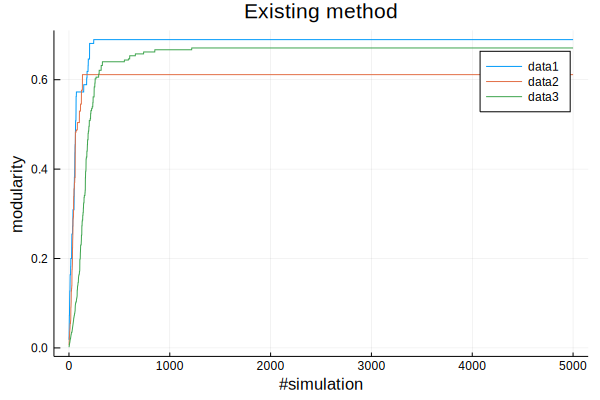

In [263]:
Plots.plot(hcat(hist1, hist2, hist3), label=["data1" "data2" "data3"], title="Existing method", xlabel="#simulation", ylabel="modularity")

In [21]:
include("./HypergraphClustering.jl")
act_sc = part2is_samecluster(tr_data)
pred_sc = part2is_samecluster(part)
jl_sc = part2is_samecluster(bp)

499500-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 ⋮
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [22]:
jl_fscore = f1_score(act_sc, jl_sc)
jl_acc = accuracy_score(act_sc, jl_sc)
fscore = f1_score(act_sc, pred_sc)
acc = accuracy_score(act_sc, pred_sc)

0.21793993993993993

In [23]:
fscore, acc, jl_fscore, jl_acc

(0.17760729932232006, 0.21793993993993993, 0.18135975160181522, 0.21088488488488488)

In [739]:
fscore = f1_score(y, act)
acc = accuracy_score(y, act)

1.0

In [293]:
fscore, acc

(1.0, 1.0)

In [24]:
include("HypergraphClustering.jl")
# @time build_bg(cookpad)
@time arr1, arr2 = h2correlation(rg)
# @time arr1, arr2 = h2correlation(cookpad)

  0.708851 seconds (1.11 M allocations: 67.597 MiB, 2.48% gc time)


([406, 3592, 3232, 3249, 3417, 3646, 3326, 193, 854, 3562  …  5713, 8001, 7450, 7795, 7449, 8744, 8000, 8955, 7666, 7212], [8148, 3975, 2082, 3128, 660, 11384, 413, 11518, 10030, 8009  …  5041, 10250, 11148, 4556, 10305, 200, 7448, 8159, 3552, 1217])

In [26]:
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

(-0.004042534073164226, -0.0026735869721652753)

In [647]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])

Dict{Int64,Dict{Int64,Int64}} with 1000 entries:
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  74  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  905 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  176 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  892 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  285 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  318 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  873 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  975 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  354 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  610 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  563 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85

In [436]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])

Dict{Int64,Dict{Int64,Int64}} with 500 entries:
  288 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  11  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  491 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  134 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  158 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  160 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  215 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  464 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  131 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  391 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  249 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=

In [648]:
for (i, e) in enumerate(okapi_e)
    rank1[e.from][e.to-nhv(rg)] = i
end

for (i, e) in enumerate(tfidf_e)
    rank2[e.from][e.to-nhv(rg)] = i
end

In [649]:
arr1 = Array{Int64}([])
arr2 = Array{Int64}([])
for node in 1:nhv(rg)
    for he in 1:nhe(rg)
#         if rank1[node][he] != 0 println(rank1[node][he]) end
#         println(rank1[node][he])
        if rank1[node][he] != 0 push!(arr1, rank1[node][he]::Int64) end
        if rank2[node][he] != 0 push!(arr2, rank2[node][he]::Int64) end
    end
end
arr1
arr2

5977-element Array{Int64,1}:
   68
  532
 5408
 5365
 5684
 5841
 5578
 5532
 5747
  520
  406
 3160
 3265
    ⋮
 4606
 5136
 5409
 1126
 1181
 1089
  812
  725
 2642
 2952
 2456
 2359

In [512]:
include("./HypergraphClustering.jl")
act_sc = part2is_samecluster(tr_data)
pred_sc = part2is_samecluster(part)
jl_sc = part2is_samecluster(bp)

124750-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [514]:
fscore = f1_score(act_sc, pred_sc)
acc = accuracy_score(act_sc, pred_sc)
fscore, acc

(1.0, 1.0)

In [16]:
include("ClusteringUtil.jl")
build_bg(rg, (a, b, c, d)->rand(1)[1])

11867-element Array{edge,1}:
 edge(135, 1111, 0.9997790574898802)    
 edge(928, 1126, 0.9997642499107877)    
 edge(580, 1115, 0.9997326416160144)    
 edge(232, 1115, 0.9996731379063613)    
 edge(710, 1103, 0.9996436487388372)    
 edge(201, 1102, 0.999581563524607)     
 edge(142, 1114, 0.9994903038716114)    
 edge(757, 1114, 0.9994608008213495)    
 edge(300, 1025, 0.9994448671877059)    
 edge(721, 1109, 0.9992609000934001)    
 edge(528, 1130, 0.99913246064535)      
 edge(186, 1112, 0.9990445976759827)    
 edge(585, 1106, 0.9990329543406917)    
 ⋮                                      
 edge(871, 1124, 0.0009270278181878755) 
 edge(909, 1100, 0.0009140317707285739) 
 edge(285, 1123, 0.0008821462182790896) 
 edge(676, 1129, 0.0008746781865944797) 
 edge(789, 1124, 0.0007566624456201154) 
 edge(111, 1019, 0.0007118568370803047) 
 edge(305, 1102, 0.0004951634166716623) 
 edge(254, 1121, 0.0002712502071902101) 
 edge(857, 1083, 0.00021220272606492507)
 edge(314, 1102, 0.000186067

In [422]:
okapi_e

5976-element Array{edge,1}:
 edge(474, 595, 1.7287111814491267) 
 edge(109, 537, 1.5087976810200372) 
 edge(203, 546, 1.47742305582154)   
 edge(203, 545, 1.4473266864420467) 
 edge(109, 540, 1.4473266864420467) 
 edge(474, 592, 1.435652681237273)  
 edge(490, 595, 1.4275408753071768) 
 edge(482, 595, 1.4275408753071768) 
 edge(250, 544, 1.4164821308530162) 
 edge(474, 584, 1.4091106311930666) 
 edge(150, 529, 1.3835223686522922) 
 edge(145, 529, 1.3835223686522922) 
 edge(137, 529, 1.3835223686522922) 
 ⋮                                  
 edge(125, 603, 0.14731309666677198)
 edge(5, 603, 0.14731309666677198)  
 edge(186, 602, 0.1466446389681438) 
 edge(11, 602, 0.1466446389681438)  
 edge(383, 601, 0.14440655613499506)
 edge(186, 601, 0.14440655613499506)
 edge(11, 601, 0.14440655613499506) 
 edge(383, 603, 0.14117465578249266)
 edge(186, 603, 0.14117465578249266)
 edge(11, 603, 0.14117465578249266) 
 edge(176, 602, 0.14053385606546856)
 edge(176, 603, 0.13529181083898184)

In [423]:
tfidf_e

5976-element Array{edge,1}:
 edge(474, 595, 0.10645241345053705) 
 edge(109, 537, 0.09383611596993657) 
 edge(490, 595, 0.09246201875215149) 
 edge(482, 595, 0.09246201875215149) 
 edge(203, 546, 0.09170347697061984) 
 edge(150, 529, 0.09140895788362914) 
 edge(145, 529, 0.09140895788362914) 
 edge(137, 529, 0.09140895788362914) 
 edge(203, 545, 0.0896656219268283)  
 edge(109, 540, 0.0896656219268283)  
 edge(250, 544, 0.08959607976542598) 
 edge(414, 595, 0.08912373393653843) 
 edge(401, 595, 0.08912373393653843) 
 ⋮                                   
 edge(186, 601, 0.010674492795524062)
 edge(11, 601, 0.010674492795524062) 
 edge(457, 603, 0.010648399829868017)
 edge(453, 603, 0.010648399829868017)
 edge(312, 603, 0.010648399829868017)
 edge(125, 603, 0.010648399829868017)
 edge(5, 603, 0.010648399829868017)  
 edge(176, 602, 0.010629731968405245)
 edge(383, 603, 0.010431890686534879)
 edge(186, 603, 0.010431890686534879)
 edge(11, 603, 0.010431890686534879) 
 edge(176, 603, 0.0102

In [676]:
cookpad

487568×1712897 Hypergraph{Int64,Nothing,Nothing}:
 1          nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing  1         nothing  1            nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
  nothing  1         nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing  1         nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   no

In [9]:
rg

UndefVarError: UndefVarError: rg not defined